In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_api" 

In [ ]:
%mkdir /content/data
%cd /content/data

/content/data


In [ ]:
! kaggle datasets download -d puneet6060/intel-image-classification

 94% 326M/346M [00:01<00:00, 205MB/s]
100% 346M/346M [00:01<00:00, 196MB/s]


In [ ]:
%%capture --no-display

! unzip /content/data/intel-image-classification.zip

# How to read images using open cv

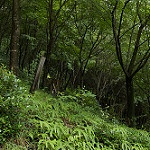

In [ ]:
11# how to read image using opencv
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


image_path = '/content/data/seg_train/seg_train/forest/10007.jpg'

image = cv2.imread(image_path)

cv2_imshow(image)

# What is image ?

In [ ]:
type(image)

numpy.ndarray

In [ ]:
print(image)

[[[ 14  33  30]
  [ 10  27  24]
  [ 24  37  35]
  ...
  [ 97 162 140]
  [ 81 139 115]
  [ 47 103  80]]

 [[  0  19  16]
  [ 13  30  27]
  [ 24  37  35]
  ...
  [ 51 115  93]
  [146 203 182]
  [155 208 188]]

 [[  8  27  24]
  [ 35  52  49]
  [ 11  25  23]
  ...
  [ 63 123 105]
  [117 169 152]
  [104 152 134]]

 ...

 [[ 36  53  62]
  [  0   3   9]
  [ 39  72  75]
  ...
  [ 28  94  65]
  [  3  66  40]
  [ 41 105  76]]

 [[ 85 104 111]
  [ 74 103 107]
  [ 51  95  96]
  ...
  [ 59 134 106]
  [ 20  91  65]
  [ 61 130 103]]

 [[ 91 113 118]
  [ 73 104 107]
  [ 62 112 110]
  ...
  [ 87 168 141]
  [ 17  90  64]
  [ 12  83  57]]]


In [ ]:
print(image.shape)

(150, 150, 3)


# Problems ?!
## How to read a Folder ?
## get all images 

In [ ]:
import os 
data_path = '/content/data/seg_train/seg_train/'
forest_images_path = data_path+'forest/'
forest_images_name = os.listdir(forest_images_path) #image forestes
forest_images_full_path = [forest_images_path+f for f in forest_images_name]
forest_images_full_path

['/content/data/seg_train/seg_train/forest/10731.jpg',
 '/content/data/seg_train/seg_train/forest/19858.jpg',
 '/content/data/seg_train/seg_train/forest/10654.jpg',
 '/content/data/seg_train/seg_train/forest/1736.jpg',
 '/content/data/seg_train/seg_train/forest/18350.jpg',
 '/content/data/seg_train/seg_train/forest/8599.jpg',
 '/content/data/seg_train/seg_train/forest/11659.jpg',
 '/content/data/seg_train/seg_train/forest/15153.jpg',
 '/content/data/seg_train/seg_train/forest/14259.jpg',
 '/content/data/seg_train/seg_train/forest/4321.jpg',
 '/content/data/seg_train/seg_train/forest/19814.jpg',
 '/content/data/seg_train/seg_train/forest/16124.jpg',
 '/content/data/seg_train/seg_train/forest/15264.jpg',
 '/content/data/seg_train/seg_train/forest/9492.jpg',
 '/content/data/seg_train/seg_train/forest/1590.jpg',
 '/content/data/seg_train/seg_train/forest/18263.jpg',
 '/content/data/seg_train/seg_train/forest/16082.jpg',
 '/content/data/seg_train/seg_train/forest/17183.jpg',
 '/content/data

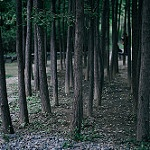

In [ ]:
image = cv2.imread('/content/data/seg_train/seg_train/forest/4348.jpg')
cv2_imshow(image)

# other way

In [ ]:

import glob
import cv2 as cv

images_path = glob.glob("/content/data/seg_train/seg_train/forest/*.jpg")
images_path

['/content/data/seg_train/seg_train/forest/10731.jpg',
 '/content/data/seg_train/seg_train/forest/19858.jpg',
 '/content/data/seg_train/seg_train/forest/10654.jpg',
 '/content/data/seg_train/seg_train/forest/1736.jpg',
 '/content/data/seg_train/seg_train/forest/18350.jpg',
 '/content/data/seg_train/seg_train/forest/8599.jpg',
 '/content/data/seg_train/seg_train/forest/11659.jpg',
 '/content/data/seg_train/seg_train/forest/15153.jpg',
 '/content/data/seg_train/seg_train/forest/14259.jpg',
 '/content/data/seg_train/seg_train/forest/4321.jpg',
 '/content/data/seg_train/seg_train/forest/19814.jpg',
 '/content/data/seg_train/seg_train/forest/16124.jpg',
 '/content/data/seg_train/seg_train/forest/15264.jpg',
 '/content/data/seg_train/seg_train/forest/9492.jpg',
 '/content/data/seg_train/seg_train/forest/1590.jpg',
 '/content/data/seg_train/seg_train/forest/18263.jpg',
 '/content/data/seg_train/seg_train/forest/16082.jpg',
 '/content/data/seg_train/seg_train/forest/17183.jpg',
 '/content/data

# let's make functions to make job easier

In [ ]:
from tqdm import tqdm

def get_images(images_class,images_path):

  """
  About get_images
  ----------------
  function to read alot of images from directory (Folder)

  Parameters
  ----------
  images_class : str
    The type of image and the name of directory that is used to learn the model to creat Y

  images_path : str
    The directory or Folder where images are  

  Returns
  -------
  This function will return 2 arrays 
    first one ==> images : list
      array of images
    second one ==> lables :list
      array of labels     
  """
  
  data_path = images_path 

  images_full_path = glob.glob(data_path+images_class+"/*.jpg") # full images path

  images = []
  labels = []
  for image_path in tqdm(images_full_path):
    image = cv2.imread(image_path)
    images.append(image)
    labels.append(images_class) 
  return images , labels

In [ ]:
forest_images , forest = get_images(images_class='forest',
                                    images_path='/content/data/seg_train/seg_train/')

100%|██████████| 2271/2271 [00:01<00:00, 1397.26it/s]


In [ ]:
len(forest) == len(forest_images)

True

In [ ]:
len(forest_images) 

2271

In [ ]:
forest_images[0].shape

(150, 150, 3)

In [ ]:
! ls '/content/data/seg_train/seg_train/'

buildings  forest  glacier  mountain  sea  street


In [ ]:
mountain_images , mountain = get_images(images_class='mountain',
                                    images_path='/content/data/seg_train/seg_train/')

100%|██████████| 2512/2512 [00:02<00:00, 1231.69it/s]


In [ ]:
sea_images , sea = get_images(images_class='sea',
                                    images_path='/content/data/seg_train/seg_train/')

100%|██████████| 2274/2274 [00:01<00:00, 1765.51it/s]


In [ ]:
buildings_images , buildings = get_images(images_class='buildings',
                                    images_path='/content/data/seg_train/seg_train/')

100%|██████████| 2191/2191 [00:01<00:00, 1555.16it/s]


In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


def sample(images,labels,ii):

  plt.figure(figsize=(15,15))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      img = cv2.cvtColor(images[i+ii], cv2.COLOR_BGR2RGB)
      plt.imshow(img)
      plt.xlabel(labels[0],fontsize=18)

  plt.show()
  
# plus 80 gray image

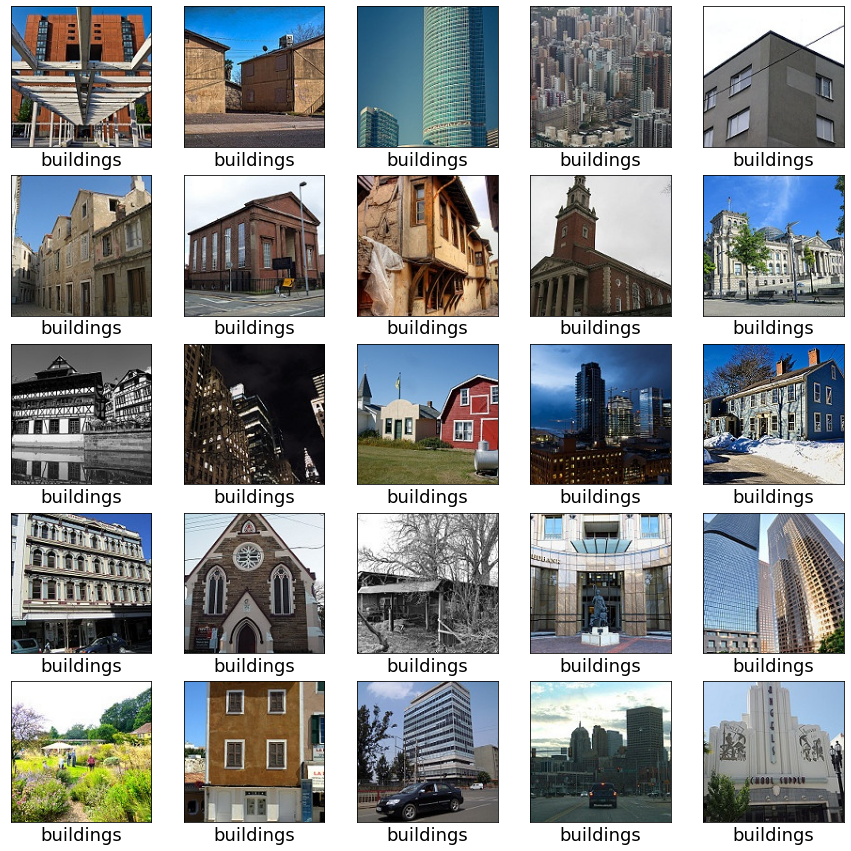

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = cv2.cvtColor(buildings_images[i+80], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xlabel(buildings[0],fontsize=18)

plt.show()
# plus 80 gray image

# buildings
1. Resize
2. make all gray

In [ ]:
def buildings_augmention(true_images):

  """
  About get_images
  ----------------
  Image processing to show features and will be saved in new folder for more processing

  Parameters
  ----------
  true_images : list
    images will be modfied

  Returns
  -------
  This function will return array
    Images that preprocessed    
  """
  m = 0
  for i in tqdm(true_images):
    
    resized = cv2.resize(i, (100, 100))
    aug_images = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('/content/aug_data/aug_buildings/'+str(m)+'.jpg', aug_images)
    m=m+1


In [ ]:
buildings_augmention(buildings_images)

100%|██████████| 2191/2191 [00:00<00:00, 3042.67it/s]


In [ ]:
! ls /content/aug_data

aug_buildings


In [ ]:
buildings_images_aug , buildings = get_images(images_class='aug_buildings',
                                    images_path='/content/aug_data/')

100%|██████████| 2191/2191 [00:00<00:00, 2964.94it/s]


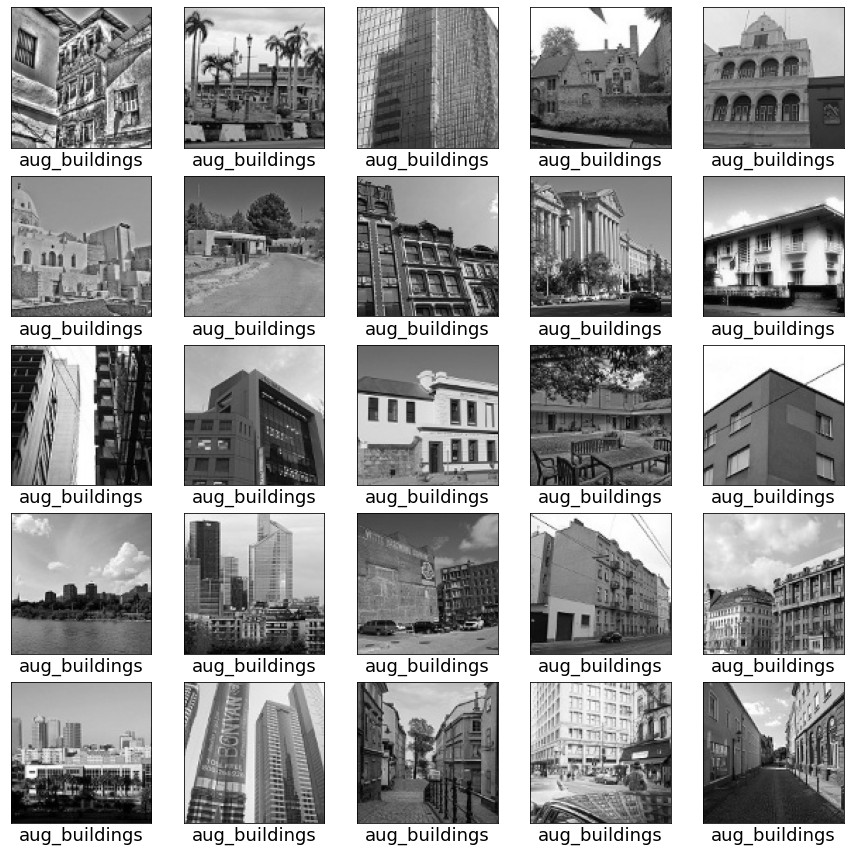

In [ ]:
sample(buildings_images_aug,buildings,9)

In [ ]:
def buildings_augmention_final(true_images):

  """
  About get_images
  ----------------
  Image processing to show features and will be saved in new folder for more processing

  Parameters
  ----------
  true_images : list
    images will be modfied

  Returns
  -------
  This function will return array
    Images that preprocessed    
  """
  m = 3000
  for img in tqdm(true_images):
    (rows, cols) = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    res = cv2.warpAffine(img, M, (cols, rows))
    cv2.imwrite('/content/aug_data/aug_buildings/'+str(m)+'.jpg', res)
    m=m+1


In [ ]:
buildings_augmention_final(buildings_images)

100%|██████████| 2191/2191 [00:02<00:00, 820.13it/s] 


In [ ]:
buildings_images_aug_final , buildings = get_images(images_class='aug_buildings',
                                    images_path='/content/aug_data/')

100%|██████████| 4382/4382 [00:02<00:00, 2027.83it/s]


# let's use other dataset for more 

In [ ]:
!pwd

/content/data


In [ ]:
! kaggle datasets download -d ahmedhaytham/chest-xray-images-pneumonia-with-new-class

 99% 0.99G/1.00G [00:16<00:00, 77.4MB/s]
100% 1.00G/1.00G [00:16<00:00, 64.1MB/s]


In [ ]:
%%capture --no-display
! unzip /content/data/chest-xray-images-pneumonia-with-new-class.zip

In [ ]:
!ls /content/data/Data_blance/Train

bacteria  Normal  virus


In [ ]:
lung_normal , normal = get_images(images_class='Normal',
                                    images_path='/content/data/Data_blance/Train')

0it [00:00, ?it/s]


# update extension

In [ ]:
from tqdm import tqdm
import glob
import cv2

def get_images_jpeg(images_class,images_path):

  """
  About get_images
  ----------------
  function to read alot of images from directory (Folder)

  Parameters
  ----------
  images_class : str
    The type of image and the name of directory that is used to learn the model to creat Y

  images_path : str
    The directory or Folder where images are  

  Returns
  -------
  This function will return 2 arrays 
    first one ==> images : list
      array of images
    second one ==> lables :list
      array of labels     
  """
  
  data_path = images_path 

  images_full_path = glob.glob(data_path+images_class+"/*.jpeg") # full images path

  images = []
  labels = []
  for image_path in tqdm(images_full_path):
    image = cv2.imread(image_path)
    resized = cv2.resize(image, (200, 200))
    images.append(resized)
    labels.append(images_class) 
  return images , labels

In [ ]:
lung_normal , normal = get_images_jpeg(images_class='Normal',
                                    images_path='/content/data/Data_blance/Train/')

100%|██████████| 1300/1300 [00:44<00:00, 29.32it/s]


# why it takes too much time ??!

# Rest run time

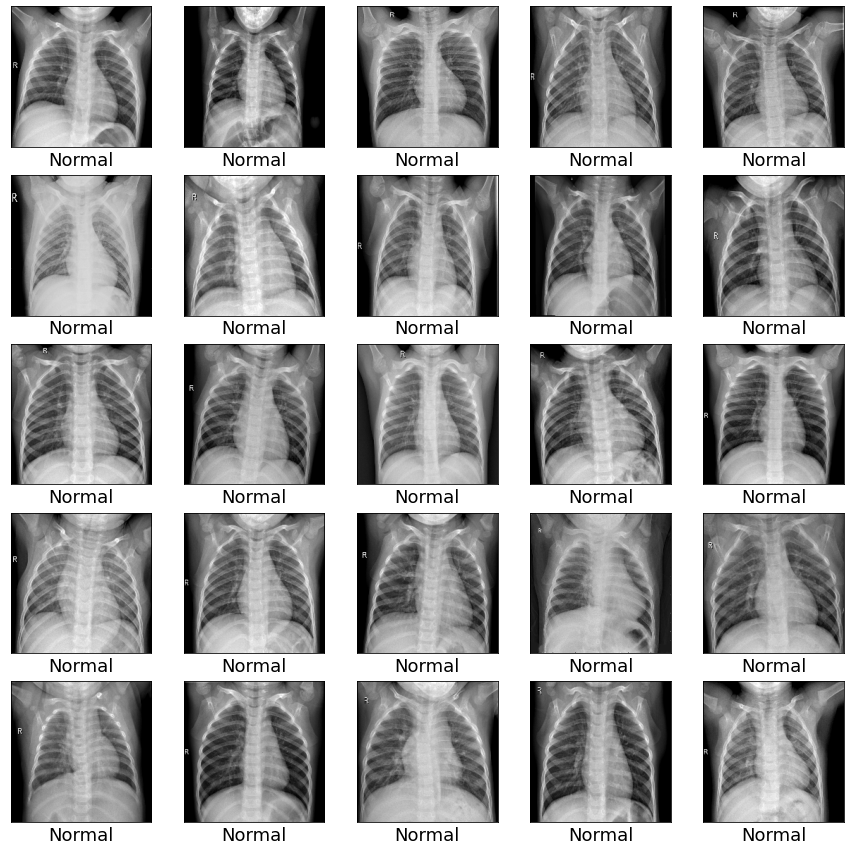

In [ ]:
sample(lung_normal , normal,10)

In [ ]:
# سبحان الله
lung_normal[0].shape

(200, 200, 3)

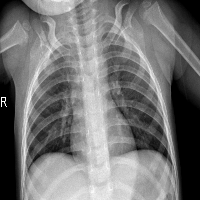

In [ ]:
# the problem only in colab not in local machine
from google.colab.patches import cv2_imshow


cv2_imshow(lung_normal[0])


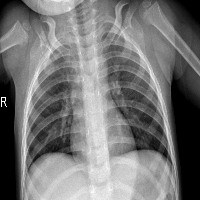

In [ ]:
img_gry = cv2.cvtColor(lung_normal[0], cv2.COLOR_BGR2GRAY)
img_gry.shape
cv2_imshow(img_gry)


In [ ]:
img_gry.shape


(200, 200)

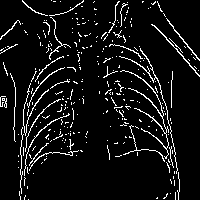

In [ ]:
# not important 
edges = cv2.Canny(img_gry,180,180)

cv2_imshow(edges)


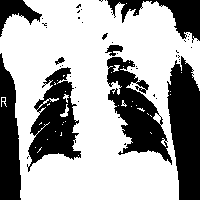

In [ ]:
thresh1 = cv2.adaptiveThreshold(img_gry, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 1)
cv2_imshow(thresh1)


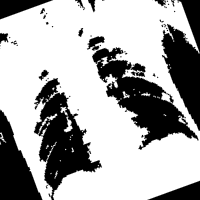

In [ ]:
(rows, cols) = thresh1.shape[:2]
center = cv2.getRotationMatrix2D((cols / 2, rows / 2), 20, 1.1)
rotated = cv2.warpAffine(thresh1, center, (cols, rows))
cv2_imshow(rotated)


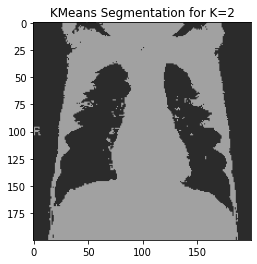

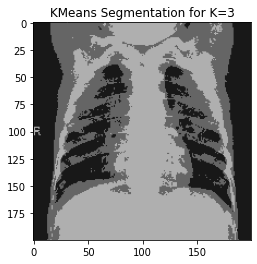

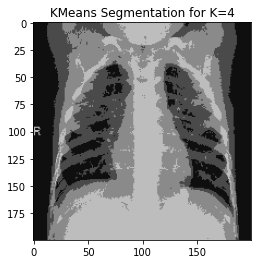

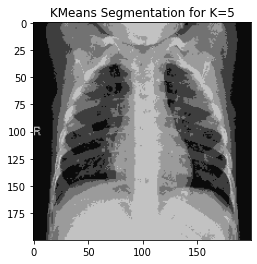

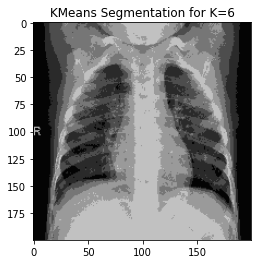

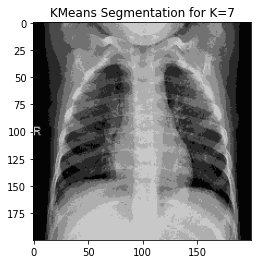

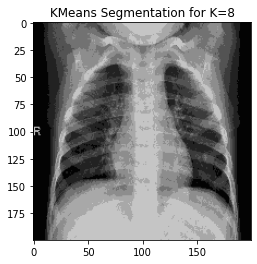

In [ ]:
def kmeans_segmentation(image, k_=2):
    img_vect = np.float32(image).reshape(-1,3)
    criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    ret, label, centroids = cv2.kmeans(img_vect, k_, None, criterio, 10, cv2.KMEANS_RANDOM_CENTERS)
    centroids = np.uint8(centroids)
    img_kmeans = centroids[label.flatten()]
    return img_kmeans.reshape(image.shape)

for k in [2, 3, 4, 5, 6, 7, 8]:
    plt.imshow(cv2.cvtColor(kmeans_segmentation(lung_normal[0], k), cv2.COLOR_BGR2RGB))
    plt.title(f"KMeans Segmentation for K={k}")
    plt.show()

# The task is to create a function that implements the previous techniques and saves all the image in a new folder

# final data set

In [ ]:
! kaggle datasets download -d ahmedhaytham/chess-object-detection-yolov5-for-chess

 71% 53.0M/74.2M [00:00<00:00, 121MB/s] 
100% 74.2M/74.2M [00:00<00:00, 114MB/s]


In [ ]:
%%capture --no-display
! unzip /content/data/chess-object-detection-yolov5-for-chess.zip

In [ ]:
from tqdm import tqdm
import glob
import cv2

def get_images(images_class,images_path,size,ext):

  """
  About get_images
  ----------------
  function to read alot of images from directory (Folder)

  Parameters
  ----------
  images_class : str
    The type of image and the name of directory that is used to learn the model to creat Y

  images_path : str
    The directory or Folder where images are

  size : int
    width and height for image

  ext : str
    images needed extion      

  Returns
  -------
  This function will return 2 arrays 
    first one ==> images : list
      array of images
    second one ==> lables :list
      array of labels     
  """
  
  data_path = images_path 

  images_full_path = glob.glob(data_path+images_class+"/*."+ext) # full images path

  images = []
  labels = []
  for image_path in tqdm(images_full_path):
    image = cv2.imread(image_path)
    resized = cv2.resize(image, (size, size))
    images.append(image)
    labels.append(images_class) 
  return images , labels

In [ ]:
! ls /content/data/train

images	labels	labels.cache


In [ ]:
chess , labels = get_images(
    images_class='images',
    images_path='/content/data/train/',
    size = 400,
    ext= 'jpg'
)

100%|██████████| 606/606 [00:02<00:00, 294.26it/s]


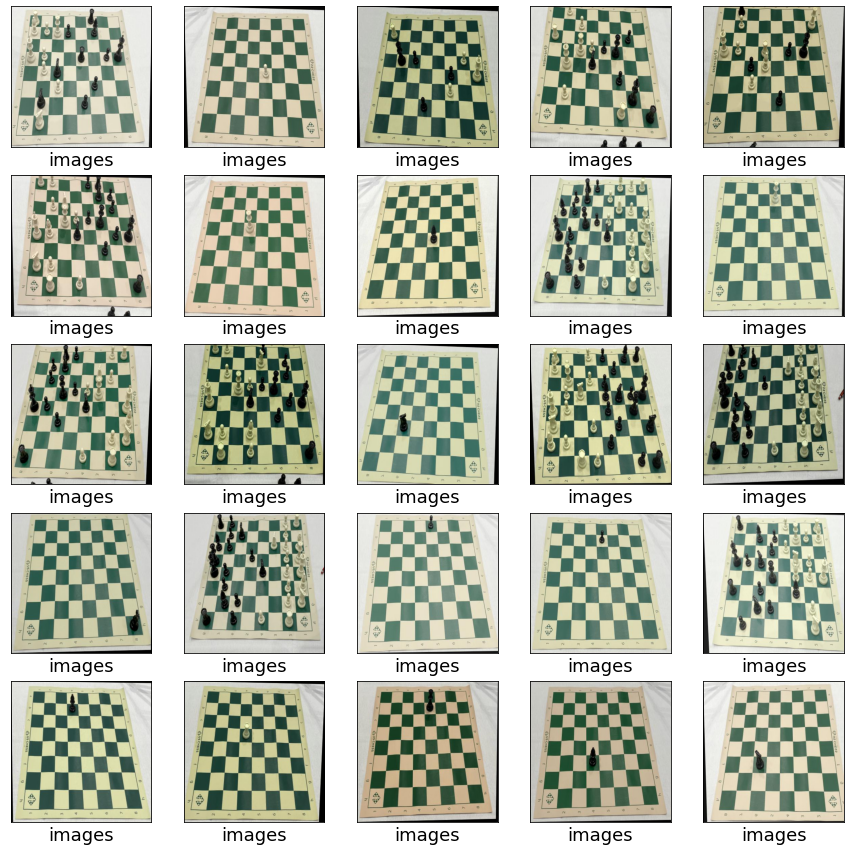

In [ ]:
sample(chess,labels,40)

In [ ]:
def chess_augmention(true_images):

  """
  About get_images
  ----------------
  Image processing to show features and will be saved in new array

  Parameters
  ----------
  true_images : list
    images will be modfied

  Returns
  -------
  This function will return array
    Images that preprocessed    
  """

  new_images = []
  for img in tqdm(true_images):
    img_gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(img_gry,120,120) # Edge detection using Canny filter
    new_images.append(edges)
  return  new_images

In [ ]:
new_chess = chess_augmention(chess)

100%|██████████| 606/606 [00:00<00:00, 612.49it/s]


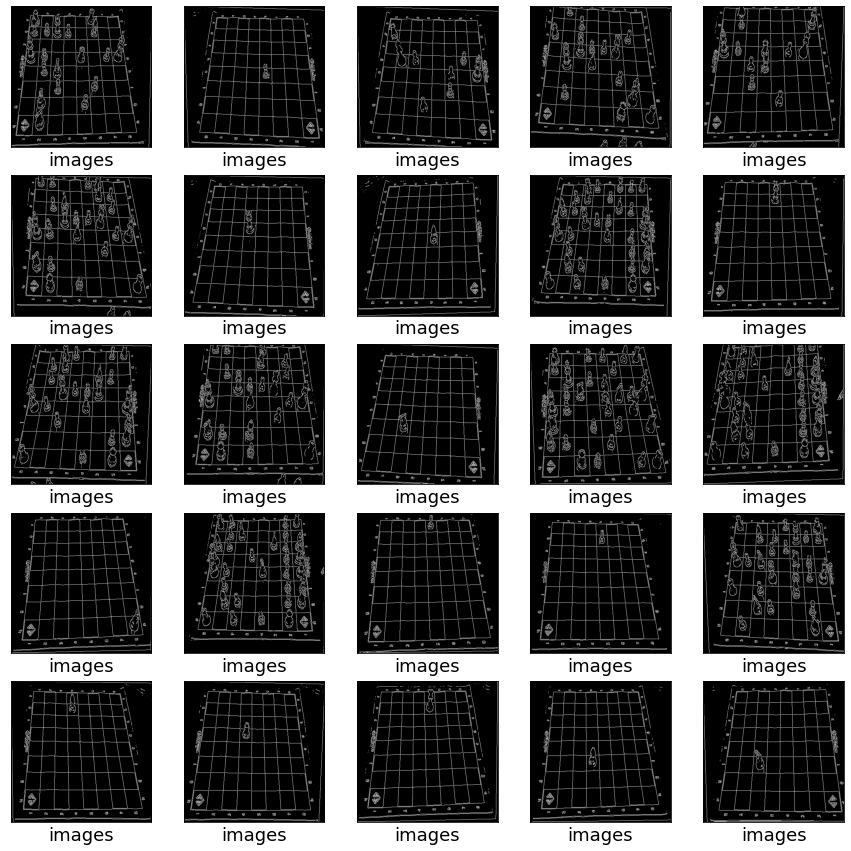

In [ ]:
sample(new_chess,labels,40)

## color is so important white not loke black 

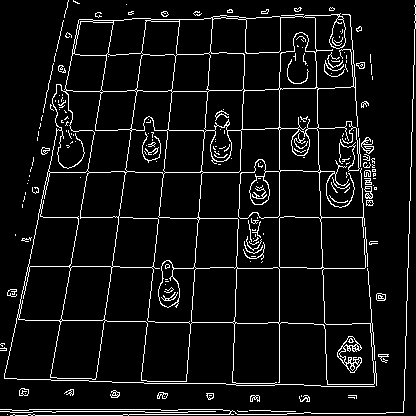

In [ ]:

cv2_imshow(new_chess[65])

In [ ]:
def chess_augmention1(true_images):

  """
  About get_images
  ----------------
  Image processing to show features and will be saved in new array

  Parameters
  ----------
  true_images : list
    images will be modfied

  Returns
  -------
  This function will return array
    Images that preprocessed    
  """

  new_images = []
  for img in tqdm(true_images):
    img_gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh1 = cv2.adaptiveThreshold(img_gry, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 1)
    new_images.append(thresh1)
  return  new_images

100%|██████████| 606/606 [00:00<00:00, 648.81it/s]


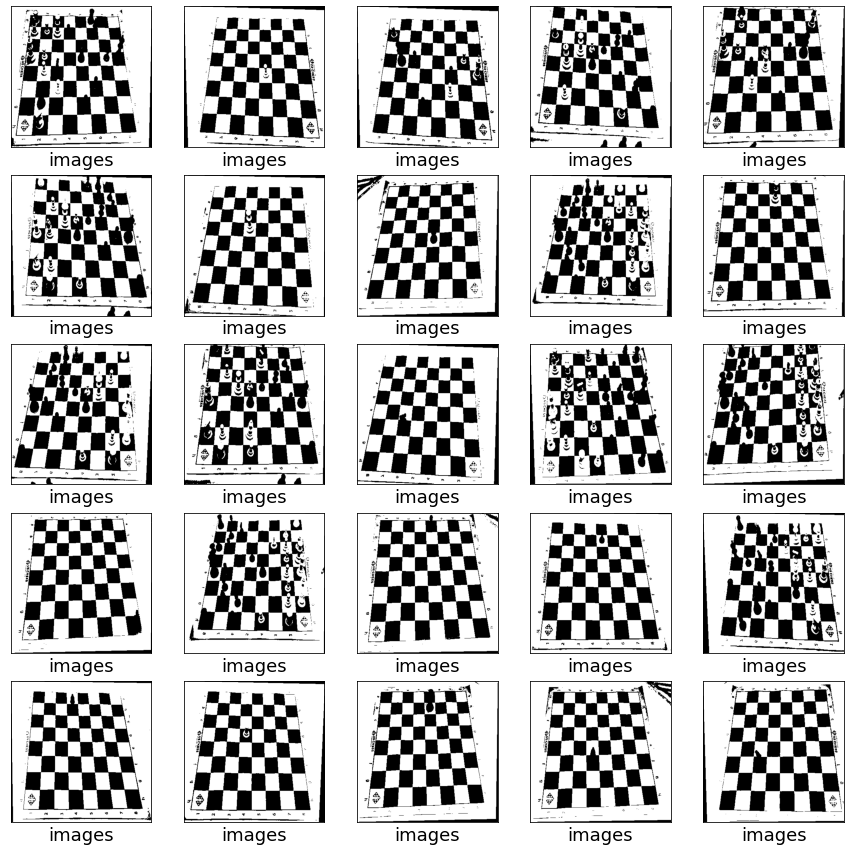

In [ ]:
new_chess1 = chess_augmention1(chess)
sample(new_chess1,labels,40)

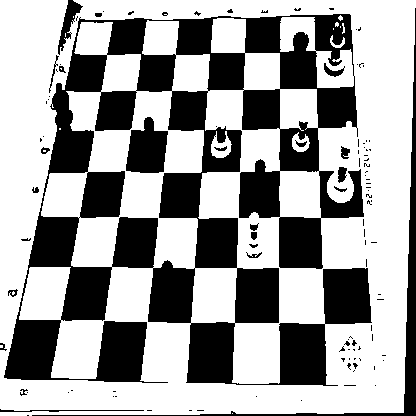

In [ ]:

cv2_imshow(new_chess1[65])

In [ ]:
def chess_augmention2(true_images):

  """
  About get_images
  ----------------
  Image processing to show features and will be saved in new array

  Parameters
  ----------
  true_images : list
    images will be modfied

  Returns
  -------
  This function will return array
    Images that preprocessed    
  """

  new_images = []
  for img in tqdm(true_images):
    img_gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    new_images.append(img_gry)
  return  new_images

100%|██████████| 606/606 [00:00<00:00, 2802.06it/s]


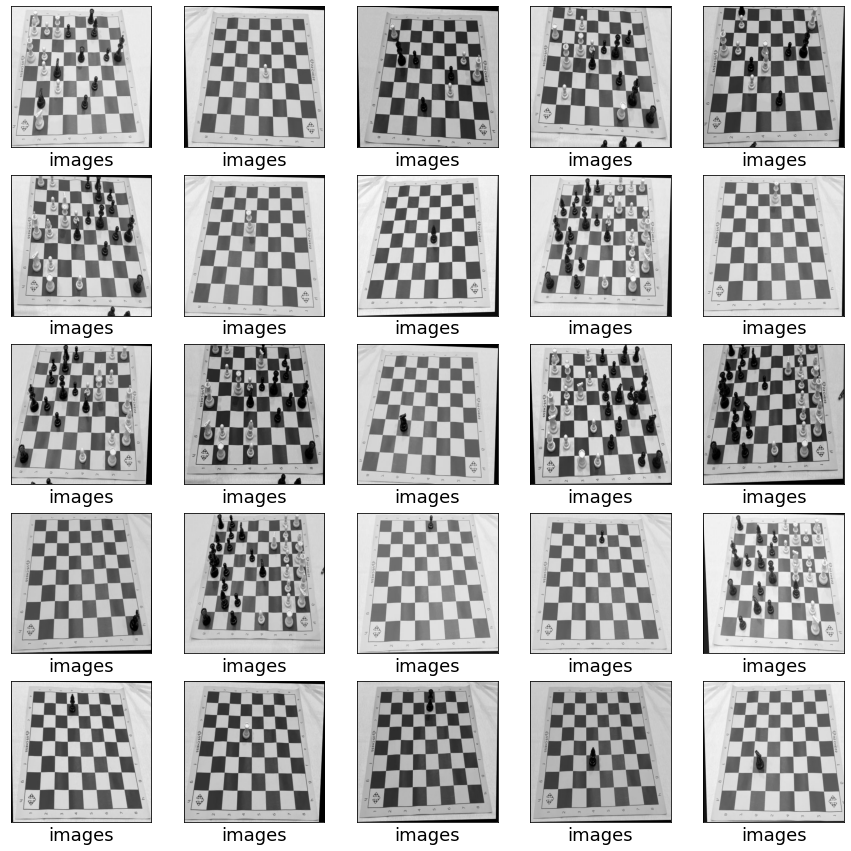

In [ ]:
new_chess2 = chess_augmention2(chess)
sample(new_chess2,labels,40)

# image segmention

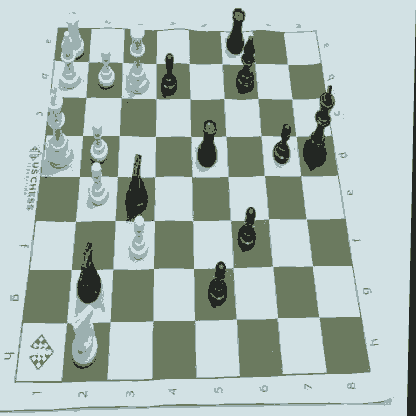

In [ ]:
import numpy as np


img = cv2.cvtColor(chess[40],cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts=10


ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))


cv2_imshow(result_image)



# I will add noise and remove it انا رايح فين انا راجع تانى

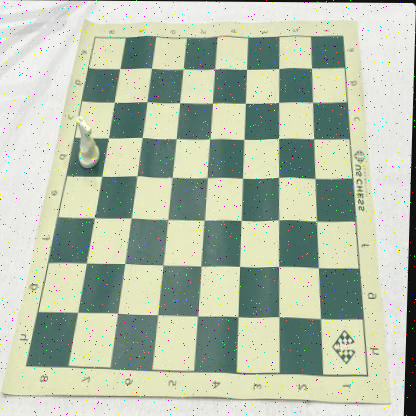

In [ ]:
from skimage.util import random_noise

noise_img = random_noise(chess[0], mode='s&p',amount=0.01)
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'

noise_img = np.array(255*noise_img, dtype = 'uint8')
cv2_imshow(noise_img)

In [ ]:
! mkdir /content/noise-data

In [ ]:
! rm -r /content/noise-data/*

In [ ]:
l = 0
for chess_image in tqdm(chess):
  noise_img = random_noise(chess_image, mode='s&p',amount=0.1)
  # The above function returns a floating-point image
  # on the range [0, 1], thus we changed it to 'uint8'
  noise_img = np.array(255*noise_img, dtype = 'uint8')
  cv2.imwrite('/content/noise-data/'+str(l)+'.jpg', noise_img)
  l += 1


100%|██████████| 606/606 [00:27<00:00, 22.41it/s]


In [ ]:
chess_noise , labels_noise = get_images(
    images_class='noise-data',
    images_path='/content/',
    size = 400,
    ext= 'jpg'
)

100%|██████████| 606/606 [00:03<00:00, 182.36it/s]


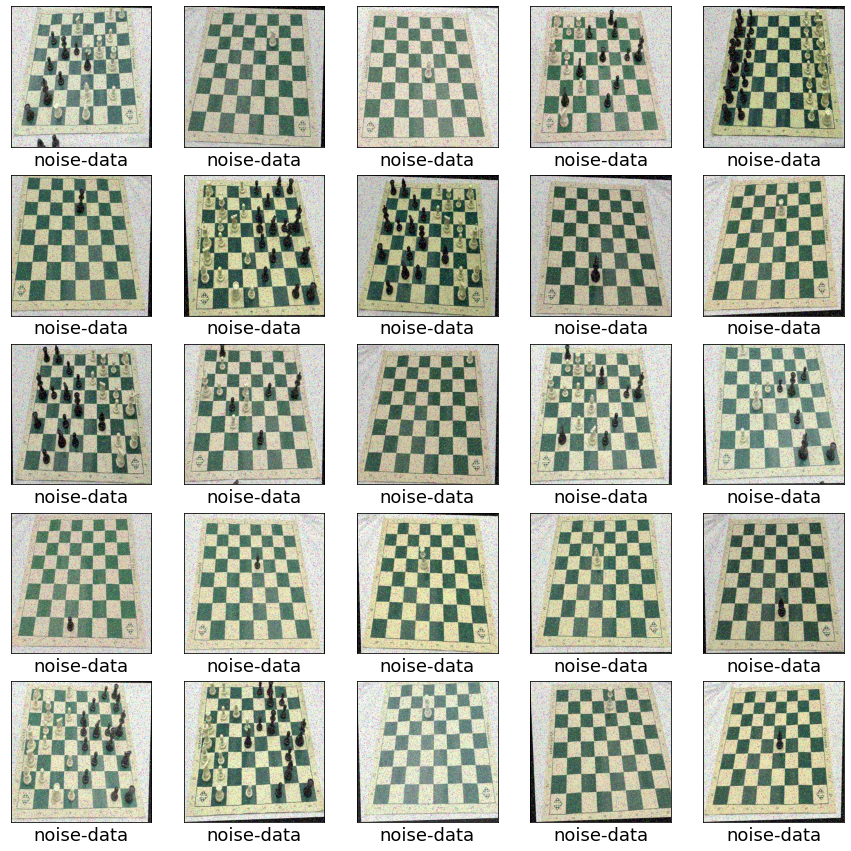

In [ ]:
sample(chess_noise , labels_noise,70)

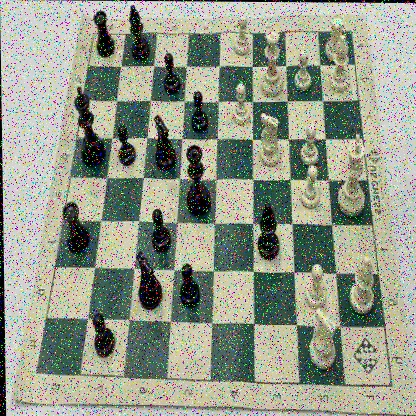

In [ ]:
cv2_imshow(chess_noise[80])


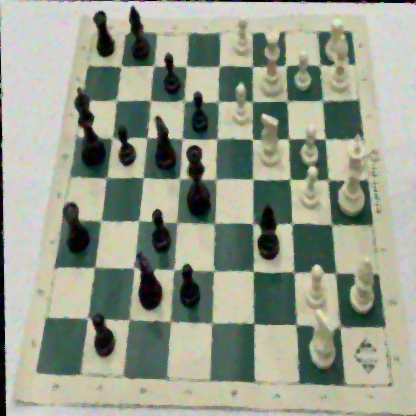

In [ ]:
median = cv2.medianBlur(chess_noise[80],5)
cv2_imshow(median)